## UTKARSH TRIPATHI

# Task 05 - Business Analytics on Sample Superstore

## Contents

### [1. Introduction](#intro)

### [2. Data Preparation](#data)
   * **Import the required libraries**
   * **Read the dataset**
   
### [3. Exploratory Data Analysis](#explore)

<a id="intro"></a>
### 1. Introduction

#### About the task
Perform Exploratory Data Analysis on the provided dataset Sample Superstore. 

#### Problem statement
You are the business owner of the retail firm and want to see how your company is performing. You are interested in finding out the weak areas where you can work to make more profit. What all business problems you can derive by looking into the data?

#### Dataset link: https://drive.google.com/file/d/1lV7is1B566UQPYzzY8R2ZmOritTW299S/view

<a id="data"></a>
### 2. Data Preparation

#### Import the required libraries

In [1]:
import pandas as pd
import numpy as np

# Libraries used for generating plots.
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings

warnings.filterwarnings("ignore")

#### Read the dataset

In [2]:
# Read the dataset and view the top 5 rows.
df = pd.read_csv("SampleSuperstore.csv")
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


<a id="explore"></a>
### 3. Exploratory Analysis

In [3]:
# Get the shape of dataset.
df.shape

(9994, 13)

The dataset contains 9994 rows and 13 columns.

In [4]:
# Get dataset information.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
Ship Mode       9994 non-null object
Segment         9994 non-null object
Country         9994 non-null object
City            9994 non-null object
State           9994 non-null object
Postal Code     9994 non-null int64
Region          9994 non-null object
Category        9994 non-null object
Sub-Category    9994 non-null object
Sales           9994 non-null float64
Quantity        9994 non-null int64
Discount        9994 non-null float64
Profit          9994 non-null float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
# Identify columns with null values.
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

None of the columns contain null values.

In [6]:
# Describe the dataset by basic statistical calculations.
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


Generate a quick summary containing count, mean, standard deviation, minimum, maximum and quartile ranges for the dataset.

In [7]:
# Get the column names from the dataset.
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

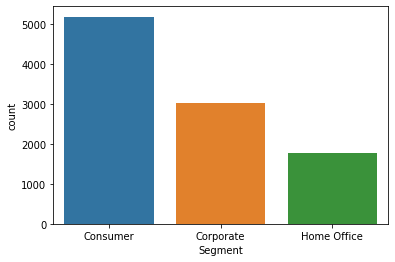

In [8]:
# Count the number of entries in the dataset belonging to a particular segment.
sns.countplot(x='Segment', data=df) 

Consumer segment has the maximum number of sales.

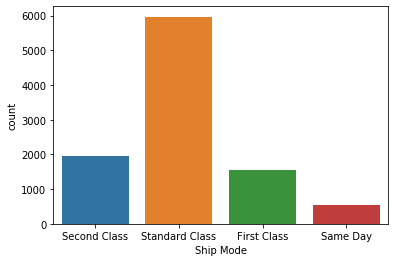

In [9]:
# What is the count of shipping mode?
sns.countplot(x ='Ship Mode', data = df) 

The most common shipping mode is Standard Class.

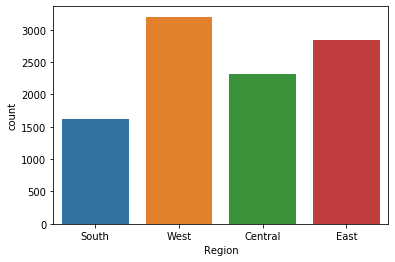

In [10]:
# Region wise sales information.
sns.countplot(x ='Region', data = df) 

West region has the most sales.

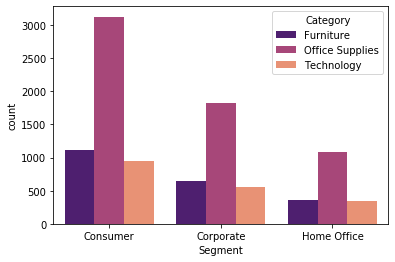

In [11]:
# Identify segment wise sales in various categories.
sns.countplot(x='Segment',hue='Category',data=df,palette='magma')

Consumer segment has the most sales, furniture is the best selling amongst the other categories.

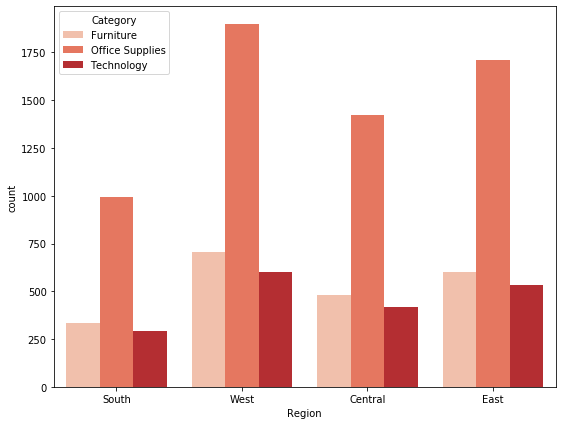

In [12]:
# Identify region wise sales in various categories.
plt.figure(figsize=(9,7))
sns.countplot(x='Region',hue ='Category',data=df,palette='Reds')

Furniture is the overall best seller in all other regions as well.

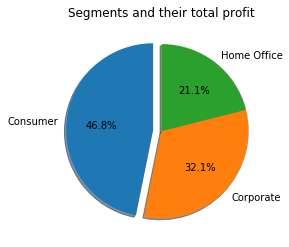

In [13]:
# Which segment produces the maximum profit?
labels = df["Segment"].unique()
data = df.groupby("Segment").sum()
profit = data["Profit"]
my_explode = (0.1, 0, 0)

plt.pie(profit, labels=labels, shadow=True, explode=my_explode, autopct="%1.1f%%", startangle=90)
plt.title("Segments and their total profit")
plt.show()

Consumer segment produces the maximum profit.

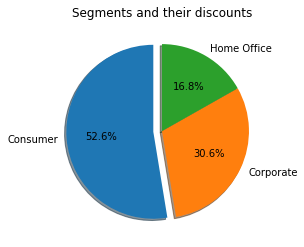

In [14]:
# Which segment provides the maximum discounts?
labels = df["Segment"].unique()
data = df.groupby("Segment").sum()
profit = data["Discount"]
my_explode = (0.1, 0, 0)

plt.pie(profit, labels=labels, shadow=True, explode=my_explode, autopct="%1.1f%%", startangle=90)
plt.title("Segments and their discounts")
plt.show()

Consumer segment avails the most discounts.

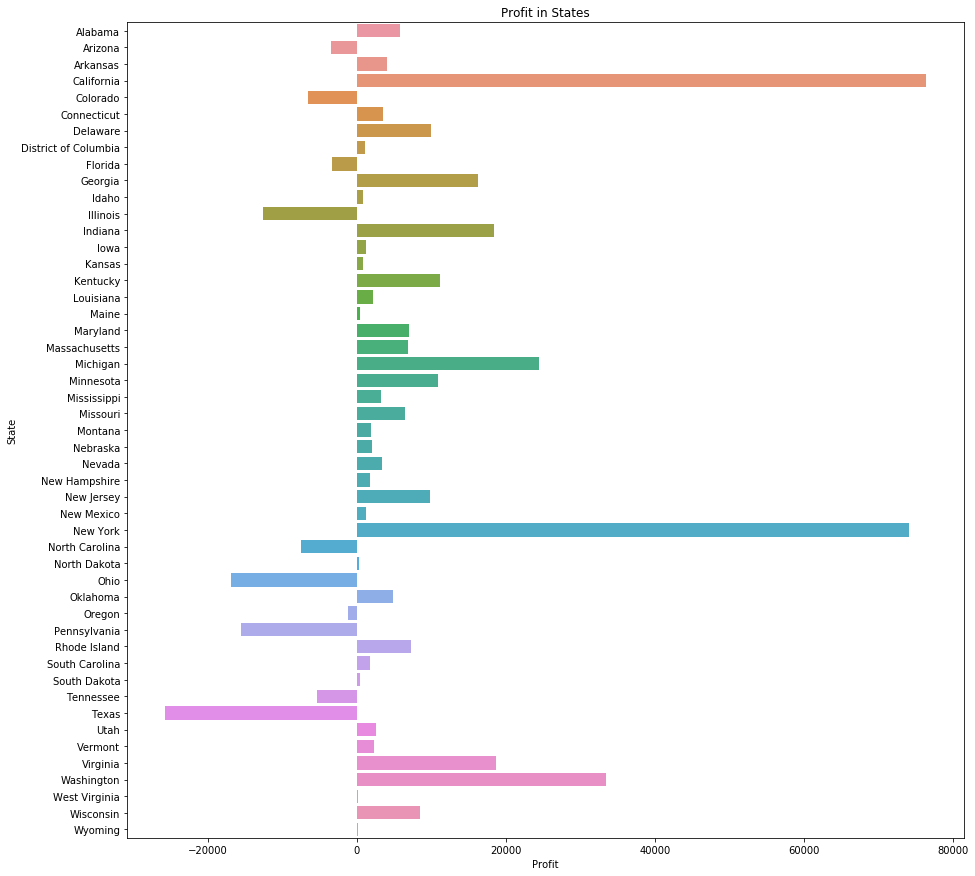

In [15]:
# State wise profit.
data = df.loc[:,['State','final_stat','Profit']]
data = data.groupby(['State'],as_index=False).sum()

plt.figure(figsize=(15,15))
sns.barplot(x='Profit',y='State',data=data).set_title('Profit in States')
sns.set_style('whitegrid')

The states of Texas, Pennsylvania, Ohio, Illinois are some of the states that are in negative profit (loss). If we are to increase our total profit, more focus should be on these states.

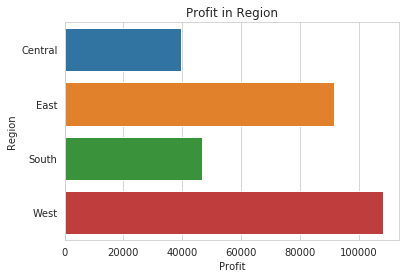

In [16]:
data = df.loc[:,['Region','final_stat','Profit']]
data = data.groupby(['Region'],as_index=False).sum()

sns.barplot(x='Profit',y='Region',data=data).set_title('Profit in Region')
sns.set_style('whitegrid')

The west region has produces most profit.

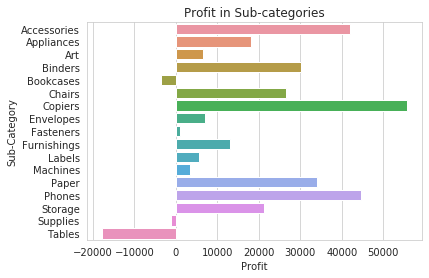

In [17]:
data = df.loc[:,['Sub-Category','final_stat','Profit']]
data = data.groupby(['Sub-Category'],as_index=False).sum()

sns.barplot(x='Profit',y='Sub-Category',data=data).set_title('Profit in Sub-categories')
sns.set_style('whitegrid')

Tables, Bookcases and Supplies are in negative profit region, they are in loss. The sales of such items can be stopped to increase our total profit.<br>
More focus can be given to high profit sub categories like Copiers, Accessories, Phoes and Paper.<br>
Discounts can be reduced to increase the profit margin! As discount is directly related to the profit.